In [2]:
!git clone -b topic/data-preparation-2 "https://github.com/lavibula/SentimentAnalysis-with-Vietnamese-reviews.git"


Cloning into 'SentimentAnalysis-with-Vietnamese-reviews'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 63 (delta 22), reused 29 (delta 4), pack-reused 0
Unpacking objects: 100% (63/63), 3.55 MiB | 5.19 MiB/s, done.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

### Loading dataset

In [4]:
#dir
train_dir="/kaggle/working/SentimentAnalysis-with-Vietnamese-reviews/Data_preprocessed/Train.csv"
test_dir="/kaggle/working/SentimentAnalysis-with-Vietnamese-reviews/Data_preprocessed/Test.csv"
valid_dir="/kaggle/working/SentimentAnalysis-with-Vietnamese-reviews/Data_preprocessed/Validation.csv"

train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
valid_df = pd.read_csv(valid_dir)

df = pd.concat([train_df, test_df, valid_df], ignore_index=True)
df.head()


,Unnamed: 0,sentence,sentiment,topic,sentence_dropped
0,0,slide giáo trình đầy đủ .,2,1,slide giáo_trình đầy_đủ
1,1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2,0,nhiệt_tình giảng_dạy gần_gũi sinh_viên
2,2,đi học đầy đủ full điểm chuyên cần .,0,1,đi học đầy_đủ chuyên_cần
3,3,chưa áp dụng công nghệ thông tin và các thiết ...,0,0,NOT áp_dụng công_nghệ thông_tin thiết_bị giảng...
4,4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2,0,thầy giảng hay nhiều bài_tập ví_dụ lớp


### Comments distribution

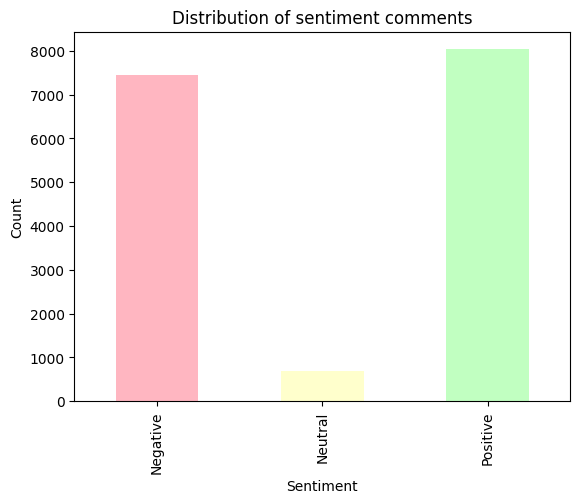

In [8]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_order = [0, 1, 2]
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
colors = ['#FFB6C1', '#FFFFCC', '#C1FFC1'] 

ax = sentiment_counts.reindex(sentiment_order).plot(kind='bar', color=colors)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Distribution of sentiment comments')
ax.set_xticklabels([sentiment_labels[i] for i in sentiment_order])

plt.show()

### Topic distributions

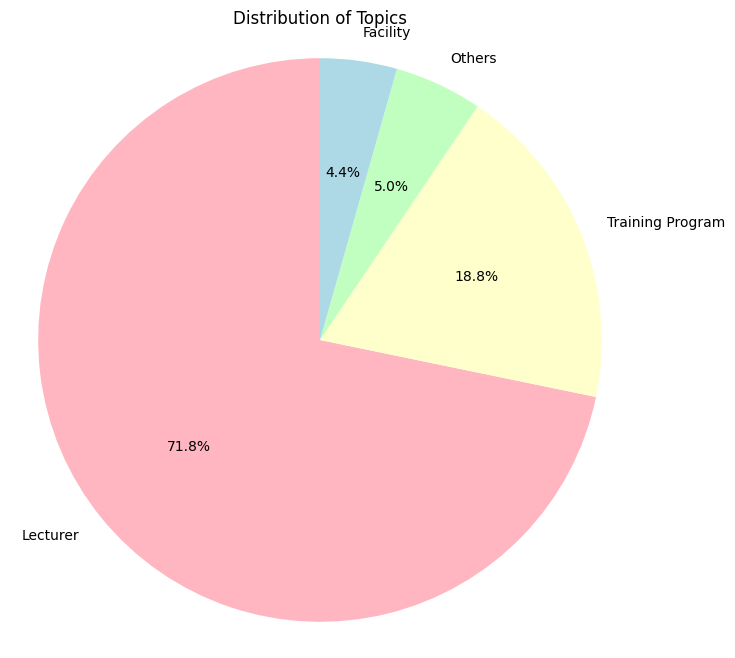

In [7]:
topic_counts = df['topic'].value_counts()
topic_labels = {0: 'Lecturer', 1: 'Training Program', 2: 'Facility', 3: 'Others'}
colors = ['#FFB6C1', '#FFFFCC', '#C1FFC1', '#ADD8E6']  #light pink, light yellow, light green, light blue

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], 
        colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Topics')
plt.axis('equal')  
plt.show()


### Top 10 common words

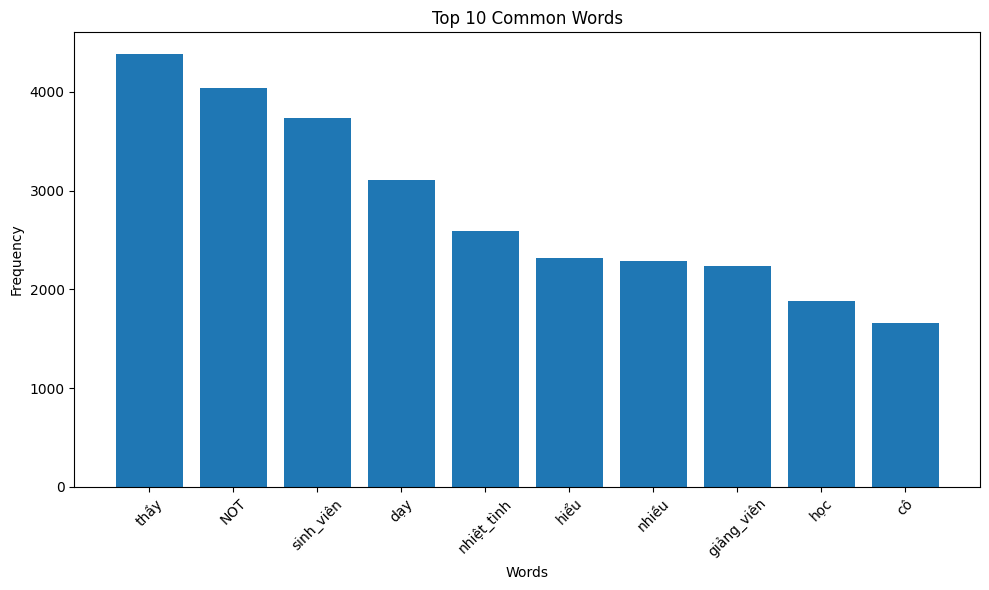

In [14]:
from collections import Counter

words = []
for sentence in df['sentence_dropped']:
   words.extend(str(sentence).split())

word_counts = Counter(words)
top_words = word_counts.most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
df.dtypes

Unnamed: 0           int64
sentence            object
sentiment            int64
topic                int64
sentence_dropped    object
dtype: object

### Top 25 common words

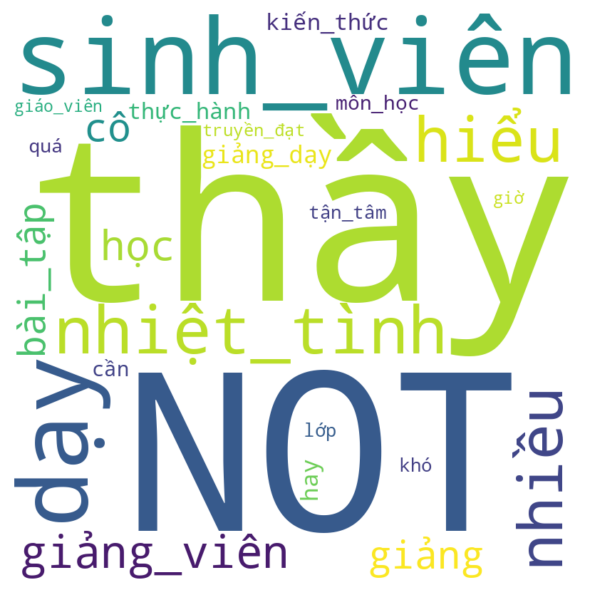

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(word_counts.most_common(25)))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()